In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

# 生成聚类所用数据集
X,y = make_blobs(n_samples=150,
                 n_features=2,
                 centers=3,
                 cluster_std=0.5,
                 shuffle=True,
                 random_state=0)
X, y

(array([[ 2.60509732,  1.22529553],
        [ 0.5323772 ,  3.31338909],
        [ 0.802314  ,  4.38196181],
        [ 0.5285368 ,  4.49723858],
        [ 2.61858548,  0.35769791],
        [ 1.59141542,  4.90497725],
        [ 1.74265969,  5.03846671],
        [ 2.37533328,  0.08918564],
        [-2.12133364,  2.66447408],
        [ 1.72039618,  5.25173192],
        [ 3.1368855 ,  1.56592763],
        [-0.37494566,  2.38787435],
        [-1.84562253,  2.71924635],
        [ 0.72144399,  4.08475018],
        [ 0.16117091,  4.53517846],
        [-1.99912714,  2.71285741],
        [-1.47804153,  3.2093591 ],
        [ 1.8706766 ,  0.77797407],
        [-1.5933443 ,  2.76898682],
        [ 2.03562611,  0.31361691],
        [ 0.64003985,  4.12401075],
        [ 2.4411628 ,  1.30941574],
        [ 1.13280393,  3.87673946],
        [ 1.04829186,  5.03092408],
        [-1.26637157,  2.62998828],
        [ 2.31690585,  0.81189049],
        [ 2.36230721,  1.358767  ],
        [ 1.2091013 ,  3.535

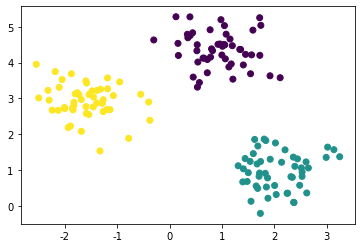

In [2]:
plt.scatter(X[:,0],X[:,1],c=y)

In [3]:
# 欧氏距离计算
def distEclud(x,y):
    return sum([(i-j)**2 for i, j in zip(x, y)])**0.5  # 计算欧氏距离
 
# 为给定数据集构建一个包含K个随机质心的集合
def randCent(dataSet,k):
    m,n = dataSet.shape
    centroids = np.zeros((k,n))
    for i in range(k):
        index = int(np.random.uniform(0,m)) # 生成一个正态分布的随机数
        centroids[i,:] = dataSet[index,:]  # 用随机数作为索引，指定某k个样本为初始的质心
    return centroids  # centroids: [[x1, y1],[x2, y2], ...] 里面每个都是质心
 
def KMeans(dataSet, k, max_iter=3, random_state=0):
    np.random.seed(random_state)
    cur_iter = 1
    m = np.shape(dataSet)[0]  # 行的数目
    # clusterAssment:
    # 第一列存样本属于哪一簇
    # 第二列存样本的到簇的中心点的误差
    clusterAssment = np.mat(np.zeros((m, 2)))
    clusterChange = True

    # 随机选择k个质心
    centroids = randCent(dataSet, k)
    while clusterChange:  # 开始迭代
        clusterChange = False

        # 遍历所有的样本
        for i in range(m):
            minDist = 100000.0  # 假设一个足够大的距离，然后逐渐通过更新缩小
            minIndex = -1

            # 遍历所有的质心，找出离样本最近的质心
            for j in range(k):
                # 计算该样本到质心的欧式距离
                distance = distEclud(centroids[j, :], dataSet[i, :])
                if distance < minDist:  # 如果比原有类的质心更近，那么更新最小距离，与新的类
                    minDist, minIndex = distance, j
                    clusterAssment[i, :] = minIndex, minDist ** 2
                    
            # 更新每一行样本所属的簇，如果没有更新，说明中心点已经不会变化了，所以停止迭代
            if clusterAssment[i, 0] != minIndex:
                clusterChange = True


        # 更新质心：计算各簇的中心点，替代原有的中心点
        if clusterChange:
            for j in range(k):
                pointsInCluster = dataSet[np.nonzero(clusterAssment[:, 0].A == j)[0]]  # 获取簇类所有的点
                centroids[j, :] = np.mean(pointsInCluster, axis=0)  # 对矩阵的行求均值

        if cur_iter == max_iter:
            clusterChange = False
            print('达到最大迭代次数:{}次'.format(max_iter))
        else:
            cur_iter += 1

    return centroids, clusterAssment


def showCluster(dataSet,k,centroids,clusterAssment):
    # 绘制所有的样本
    plt.scatter(dataSet[:,0],dataSet[:,1],c=[i[0] for i in clusterAssment[:, 0].tolist()])
    # 绘制质心
    plt.scatter(centroids[:, 0], centroids[:, 1], c='r')
    plt.show()

def Kmean_show_sse(X, k=3, max_iter=3, random_state=0):
    centroids,clusterAssment = KMeans(X,k,max_iter,random_state)
    sse = sum([i[0] for i in clusterAssment[:, 1].A])
    return sse

Validation curve of K (random_state = 1)

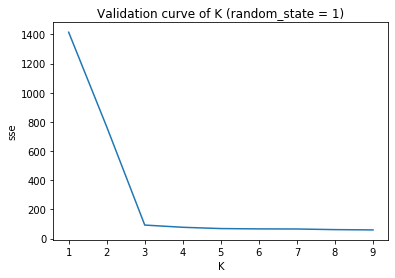

In [4]:
plt.figure()
plt.title('Validation curve of K (random_state = 1)')
plt.xlabel('K')
plt.ylabel('sse')
plt.plot(range(1,10), [Kmean_show_sse(X, k, 30, random_state=1) for k in range(1, 10)])
plt.show()

由此可见，“肘部”的k值为3

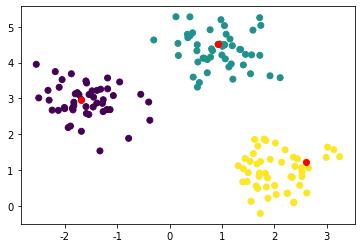

SSE: 92.2166657978224


In [5]:
k, max_iter, random_state=3, 2, 1
centroids,clusterAssment = KMeans(X,k,max_iter,random_state)
showCluster(X, 3, centroids, clusterAssment)
sse = sum([i[0] for i in clusterAssment[:, 1].A])
print('SSE:',sse)